In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report
import joblib

In [3]:
df = pd.read_csv("usercode/Amazon.csv")
print(df.head())
print(df.describe())

   Unnamed: 0                                             review  polarity  \
0        3870                            able play youtube alexa    0.5000   
1          62  able recognize indian accent really well drop ...    0.2794   
2         487  absolute smart device amazon connect external ...    0.1827   
3        3204  absolutely amaze new member family control hom...    0.3682   
4        1265  absolutely amaze previously sceptical invest m...    0.2333   

   division  
0  positive  
1  positive  
2  positive  
3  positive  
4  positive  
        Unnamed: 0     polarity
count  4084.000000  4084.000000
mean   2070.871205     0.350653
std    1203.976943     0.367858
min       0.000000    -1.000000
25%    1024.750000     0.006725
50%    2061.500000     0.383300
75%    3119.250000     0.607100
max    4156.000000     1.000000


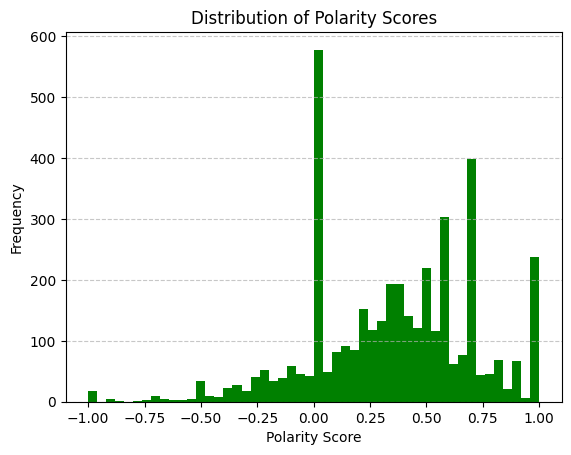

In [4]:
plt.hist(df['polarity'],color='green',bins=50)
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.title("Distribution of Polarity Scores")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

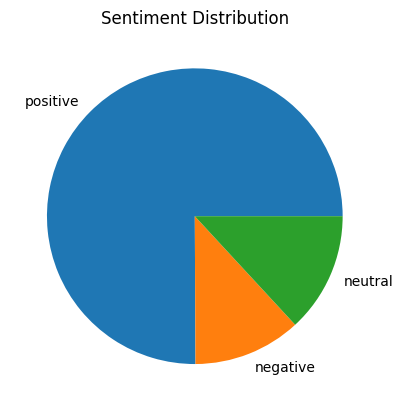

In [5]:
sentiments = ['positive', 'negative', 'neutral']
counts = []
for sentiment in sentiments:
  counts.append(df['division'].value_counts()[sentiment])
plt.pie(counts, labels=sentiments)
plt.title('Sentiment Distribution')
plt.show()



In [6]:
vectorizer = TfidfVectorizer()
tfid = pd.DataFrame(vectorizer.fit_transform(df['review']).toarray())
df = pd.concat([df,tfid], axis = 1)
df = df.drop(columns=['Unnamed: 0', 'polarity', 'review'])

In [7]:
joblib.dump(vectorizer, "/usercode/vectorizer.joblib")

['/usercode/vectorizer.joblib']

In [8]:
df = df.replace(['negative', 'neutral', 'positive'], [-1,0,1])
df.columns = df.columns.astype(str)
X = df.drop(columns=['division'])
Y = df['division']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [9]:
classifier = MLPClassifier(hidden_layer_sizes=(100,50), solver='lbfgs', alpha=1e-5, random_state=1,max_iter=2000)

In [10]:
classifier.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 50), max_iter=2000,
              random_state=1, solver='lbfgs')

In [14]:
y_pred = classifier.predict(X_test)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [16]:
filePath = "/usercode/model.pkl"

joblib.dump(classifier, filePath)

['/usercode/model.pkl']